In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/breaches.csv')
data

,Unnamed: 0,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,year,Loss
0,0,Brooke Army Medical Center,TX,Healthcare Provider,1000,2009-10-21,Theft,Paper/Films,No,2009,5000
1,1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000,2009-10-28,Theft,Network Server,No,2009,5000
2,2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,2009,1000
3,3,Health Services for Children with Special Need...,DC,Health Plan,3800,2009-11-17,Loss,Laptop,No,2009,5000
4,4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166,2009-11-20,Theft,Desktop Computer,No,2009,5000
...,...,...,...,...,...,...,...,...,...,...,...
1632,1632,Northwest Community Healthcare,IL,Healthcare Provider,540,2016-10-07,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,2016,1600
1633,1633,Warren Clinic,OK,Healthcare Provider,2938,2016-10-07,Hacking/IT Incident,Network Server,No,2016,26000
1634,1634,Baxter Healthcare,IL,Healthcare Provider,992,2016-10-10,Unauthorized Access/Disclosure,Email,No,2016,1600
1635,1635,Peabody Retirement Community,IN,Healthcare Provider,1466,2016-10-14,Hacking/IT Incident,"Email, Network Server",No,2016,26000


In [ ]:
data = data.drop(data.columns[[0]],axis = 1)


In [ ]:
data

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,year,Loss
0,Brooke Army Medical Center,TX,Healthcare Provider,1000,2009-10-21,Theft,Paper/Films,No,2009,5000
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000,2009-10-28,Theft,Network Server,No,2009,5000
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,2009,1000
3,Health Services for Children with Special Need...,DC,Health Plan,3800,2009-11-17,Loss,Laptop,No,2009,5000
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166,2009-11-20,Theft,Desktop Computer,No,2009,5000
...,...,...,...,...,...,...,...,...,...,...
1632,Northwest Community Healthcare,IL,Healthcare Provider,540,2016-10-07,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,2016,1600
1633,Warren Clinic,OK,Healthcare Provider,2938,2016-10-07,Hacking/IT Incident,Network Server,No,2016,26000
1634,Baxter Healthcare,IL,Healthcare Provider,992,2016-10-10,Unauthorized Access/Disclosure,Email,No,2016,1600
1635,Peabody Retirement Community,IN,Healthcare Provider,1466,2016-10-14,Hacking/IT Incident,"Email, Network Server",No,2016,26000


In [ ]:
corr = data.corr()

<AxesSubplot:>

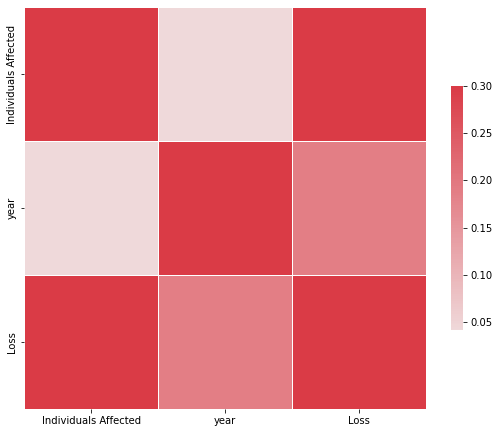

In [ ]:
f, ax = plt.subplots(figsize=(9, 9))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
data.describe()

,Individuals Affected,year,Loss
count,1637.000000,1637.000000,1637.000000
mean,6840.324374,2013.168601,16649.786194
std,13079.686023,1.958223,33588.441010
min,0.000000,2009.000000,0.000000
25%,950.000000,2012.000000,0.000000
50%,2082.000000,2013.000000,5000.000000
75%,6332.000000,2015.000000,26000.000000
max,97000.000000,2016.000000,250000.000000


In [ ]:
data

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,year,Loss
0,Brooke Army Medical Center,TX,Healthcare Provider,1000,2009-10-21,Theft,Paper/Films,No,2009,5000
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000,2009-10-28,Theft,Network Server,No,2009,5000
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,2009,1000
3,Health Services for Children with Special Need...,DC,Health Plan,3800,2009-11-17,Loss,Laptop,No,2009,5000
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166,2009-11-20,Theft,Desktop Computer,No,2009,5000
...,...,...,...,...,...,...,...,...,...,...
1632,Northwest Community Healthcare,IL,Healthcare Provider,540,2016-10-07,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,2016,1600
1633,Warren Clinic,OK,Healthcare Provider,2938,2016-10-07,Hacking/IT Incident,Network Server,No,2016,26000
1634,Baxter Healthcare,IL,Healthcare Provider,992,2016-10-10,Unauthorized Access/Disclosure,Email,No,2016,1600
1635,Peabody Retirement Community,IN,Healthcare Provider,1466,2016-10-14,Hacking/IT Incident,"Email, Network Server",No,2016,26000


In [ ]:
cols = ['Individuals Affected']
for col in cols:
   data[col] = data[col].apply(lambda x: int(x) if x == x else "")

In [ ]:
data

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,year,Loss
0,Brooke Army Medical Center,TX,Healthcare Provider,1000,2009-10-21,Theft,Paper/Films,No,2009,5000
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000,2009-10-28,Theft,Network Server,No,2009,5000
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,2009,1000
3,Health Services for Children with Special Need...,DC,Health Plan,3800,2009-11-17,Loss,Laptop,No,2009,5000
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166,2009-11-20,Theft,Desktop Computer,No,2009,5000
...,...,...,...,...,...,...,...,...,...,...
1632,Northwest Community Healthcare,IL,Healthcare Provider,540,2016-10-07,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,2016,1600
1633,Warren Clinic,OK,Healthcare Provider,2938,2016-10-07,Hacking/IT Incident,Network Server,No,2016,26000
1634,Baxter Healthcare,IL,Healthcare Provider,992,2016-10-10,Unauthorized Access/Disclosure,Email,No,2016,1600
1635,Peabody Retirement Community,IN,Healthcare Provider,1466,2016-10-14,Hacking/IT Incident,"Email, Network Server",No,2016,26000


In [ ]:
data.dropna()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,year,Loss
0,Brooke Army Medical Center,TX,Healthcare Provider,1000,2009-10-21,Theft,Paper/Films,No,2009,5000
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000,2009-10-28,Theft,Network Server,No,2009,5000
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,2009,1000
3,Health Services for Children with Special Need...,DC,Health Plan,3800,2009-11-17,Loss,Laptop,No,2009,5000
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166,2009-11-20,Theft,Desktop Computer,No,2009,5000
...,...,...,...,...,...,...,...,...,...,...
1632,Northwest Community Healthcare,IL,Healthcare Provider,540,2016-10-07,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,2016,1600
1633,Warren Clinic,OK,Healthcare Provider,2938,2016-10-07,Hacking/IT Incident,Network Server,No,2016,26000
1634,Baxter Healthcare,IL,Healthcare Provider,992,2016-10-10,Unauthorized Access/Disclosure,Email,No,2016,1600
1635,Peabody Retirement Community,IN,Healthcare Provider,1466,2016-10-14,Hacking/IT Incident,"Email, Network Server",No,2016,26000


In [ ]:
data['Individuals Affected'].replace([''], [0], inplace=True)

In [ ]:
data.dtypes

Name of Covered Entity              object
State                               object
Covered Entity Type                 object
Individuals Affected                 int64
Breach Submission Date              object
Type of Breach                      object
Location of Breached Information    object
Business Associate Present          object
year                                 int64
Loss                                 int64
dtype: object

In [ ]:
data['Breach Submission Date'] =  pd.to_datetime(data['Breach Submission Date'])
data['Individuals Affected'] = data['Individuals Affected'].astype('int')
data.dtypes

Name of Covered Entity                      object
State                                       object
Covered Entity Type                         object
Individuals Affected                         int64
Breach Submission Date              datetime64[ns]
Type of Breach                              object
Location of Breached Information            object
Business Associate Present                  object
year                                         int64
Loss                                         int64
dtype: object

In [ ]:
data['Individuals Affected'].round(decimals = 0)

0       1000
1       1000
2        501
3       3800
4       5166
        ... 
1632     540
1633    2938
1634     992
1635    1466
1636    7242
Name: Individuals Affected, Length: 1637, dtype: int64

In [ ]:
data.nunique()

Name of Covered Entity              1497
State                                 52
Covered Entity Type                    4
Individuals Affected                1153
Breach Submission Date              1024
Type of Breach                        28
Location of Breached Information      60
Business Associate Present             2
year                                   8
Loss                                  13
dtype: int64

In [ ]:
data['Covered Entity Type'].unique()

array(['Healthcare Provider', 'Health Plan', 'Business Associate', nan,
       'Healthcare Clearing House'], dtype=object)

In [ ]:
data.groupby(data['Type of Breach'])['Name of Covered Entity'].nunique()

Type of Breach
Hacking/IT Incident                                           195
Hacking/IT Incident, Other                                      2
Hacking/IT Incident, Other, Unauthorized Access/Disclosure      1
Hacking/IT Incident, Theft                                      1
Hacking/IT Incident, Theft, Unauthorized Access/Disclosure      2
Hacking/IT Incident, Unauthorized Access/Disclosure             8
Improper Disposal                                              48
Improper Disposal, Loss                                         3
Improper Disposal, Loss, Theft                                  3
Improper Disposal, Theft                                        1
Improper Disposal, Theft, Unauthorized Access/Disclosure        1
Improper Disposal, Unauthorized Access/Disclosure               1
Loss                                                          111
Loss, Other                                                     2
Loss, Other, Theft                                           

In [ ]:
data['Location of Breached Information'].unique()

array(['Paper/Films', 'Network Server',
       'Other, Other Portable Electronic Device', 'Laptop',
       'Desktop Computer', 'Other',
       'Desktop Computer, Electronic Medical Record, Network Server',
       'Desktop Computer, Laptop', 'Other Portable Electronic Device',
       'Email',
       'Electronic Medical Record, Other, Other Portable Electronic Device',
       'Other, Paper/Films', 'Email, Other Portable Electronic Device',
       'Desktop Computer, Email, Laptop, Network Server',
       'Desktop Computer, Paper/Films',
       'Desktop Computer, Laptop, Other, Other Portable Electronic Device',
       'Electronic Medical Record', 'Laptop, Paper/Films',
       'Laptop, Network Server', 'Desktop Computer, Network Server',
       'Email, Network Server',
       'Desktop Computer, Other, Other Portable Electronic Device',
       'Desktop Computer, Network Server, Other, Other Portable Electronic Device',
       'Desktop Computer, Electronic Medical Record, Email, Laptop, Netw

In [ ]:
data.describe()

,Individuals Affected,year,Loss
count,1637.000000,1637.000000,1637.000000
mean,6840.324374,2013.168601,16649.786194
std,13079.686023,1.958223,33588.441010
min,0.000000,2009.000000,0.000000
25%,950.000000,2012.000000,0.000000
50%,2082.000000,2013.000000,5000.000000
75%,6332.000000,2015.000000,26000.000000
max,97000.000000,2016.000000,250000.000000


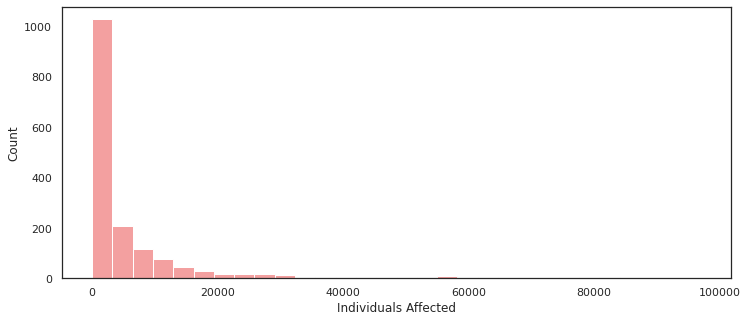

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("white")
sns.histplot(data=data, x='Individuals Affected', bins = 30, color = 'lightcoral')

In [ ]:
data = data.drop(data[data['Individuals Affected'] > 100000].index)

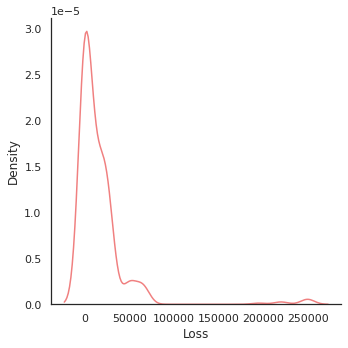

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("white")
sns.displot(data=data, x='Loss', kind="kde", color = 'lightcoral')

In [ ]:
target = data['Loss']
data.drop(['Loss'], axis = 1, inplace = True)

In [ ]:
data.drop(['Name of Covered Entity'], axis = 1, inplace = True)
data.drop(['Breach Submission Date'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder # для включения в модель категориальных признаков использовался Label Encoder
lb = LabelEncoder()

In [ ]:
data['State']=lb.fit_transform(data['State'].values)
data['Covered Entity Type']=lb.fit_transform(data['Covered Entity Type'].values)
data['Type of Breach']=lb.fit_transform(data['Type of Breach'].values)
data['Location of Breached Information']=lb.fit_transform(data['Location of Breached Information'].values)
data['Business Associate Present']=lb.fit_transform(data['Business Associate Present'].values)
data['year']=lb.fit_transform(data['year'].values)

In [ ]:
data = data.reset_index(drop=True)
data

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,year
0,44,3,1000,24,59,0,0
1,24,3,1000,24,51,0,0
2,0,3,501,24,57,0,0
3,7,1,3800,12,45,0,0
4,4,3,5166,24,0,0,0
...,...,...,...,...,...,...,...
1632,14,3,540,26,55,0,7
1633,36,3,2938,0,51,0,7
1634,14,3,992,26,37,0,7
1635,15,3,1466,0,41,0,7


In [ ]:
target = target.reset_index(drop = True)
target

0        5000
1        5000
2        1000
3        5000
4        5000
        ...  
1632     1600
1633    26000
1634     1600
1635    26000
1636    26000
Name: Loss, Length: 1637, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
import time

In [ ]:
import graphviz

In [ ]:
from memory_profiler import profile

Кросс-валидация

In [ ]:
n_folds = 3
folds= KFold(n_splits = n_folds, shuffle = False)

Однокомпонентная модель Decision Tree Regressor

In [ ]:
scores_regression = {}

In [ ]:
time_model = {}

In [ ]:
for _,(idx_train,idx_valid) in enumerate(folds.split(data, target)):
    X_train = data.iloc[idx_train]
    y_train = target[idx_train]
    X_valid = data.iloc[idx_valid]
    y_valid = target[idx_valid]

    regressor = DecisionTreeRegressor(max_depth = 6)
    regressor.fit(X_train, y_train)

    pred = regressor.predict(X_valid)
    pred = np.clip(pred, 1, 400)
    pred = np.around(pred, decimals = 1)
    print("mse",np.sqrt(mean_squared_error(pred, y_valid)))

mse 30453.416055519116
mse 26060.527258496564
mse 50911.590817142125


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'max_depth':range(3,20)}
gc = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
gc.fit(X_train, y_train)
tree_model = gc.best_estimator_
print (gc.best_score_, gc.best_params_)

0.0019522072780860488 {'max_depth': 6}


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target)

start_time = time.time()
regressor = DecisionTreeRegressor(max_depth = 6)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_valid)

print("mse",np.sqrt(mean_squared_error(pred, y_valid)))
print("--- %s seconds ---" % (time.time() - start_time))

mse 999.218170468246
--- 0.011888742446899414 seconds ---


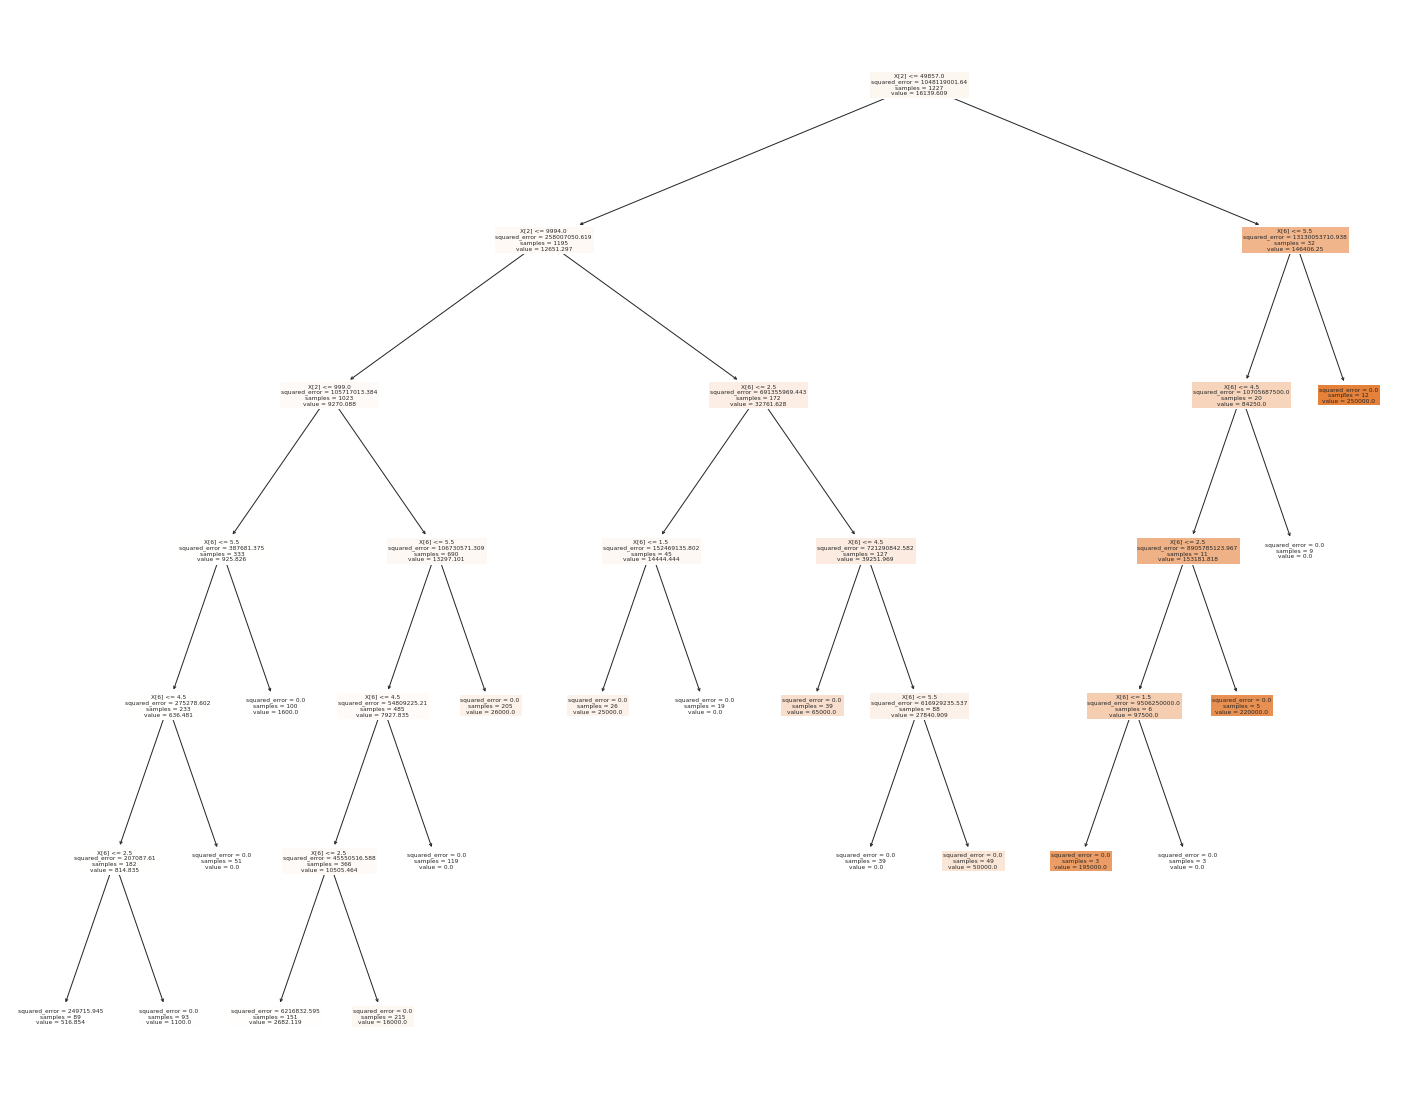

In [ ]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(regressor,
                   filled=True)

Ансамблевые модели

Стекинг

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
for _,(idx_train,idx_valid) in enumerate(folds.split(data, target)):
    X_train=data.iloc[idx_train]
    y_train=target[idx_train]
    X_valid=data.iloc[idx_valid]
    y_valid=target[idx_valid]

    st = StackingRegressor(estimators = [('dec_tree', DecisionTreeRegressor())])
    st.fit(X_train,y_train)

    pred = st.predict(X_valid)
    pred = np.clip(pred,1,400)
    pred = np.around(pred, decimals = 1)

    print("mse",np.sqrt(mean_squared_error(pred, y_valid)))


mse 30453.416055519116
mse 26055.600243120556
mse 50700.13444782492


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target)

start_time = time.time()
regressor = StackingRegressor(estimators = [('dec_tree', DecisionTreeRegressor())])
regressor.fit(X_train, y_train)

pred = regressor.predict(X_valid)

print("mse",np.sqrt(mean_squared_error(pred, y_valid)))
print("--- %s seconds ---" % (time.time() - start_time))

mse 972.1821580222551
--- 0.17150235176086426 seconds ---


Бэггинг

In [ ]:
start_time = time.time()
for _,(idx_train,idx_valid) in enumerate(folds.split(data, target)):
    X_train=data.iloc[idx_train]
    y_train=target[idx_train]
    X_valid=data.iloc[idx_valid]
    y_valid=target[idx_valid]

    bagg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=19, random_state=0)
    bagg.fit(X_train,y_train)

    pred = bagg.predict(X_valid)
    pred = np.clip(pred,1,400)
    pred = np.around(pred, decimals = 1)

    print("mse",np.sqrt(mean_squared_error(pred, y_valid)))
    print("--- %s seconds ---" % (time.time() - start_time))

time_model['Bagging'] = time.time() - start_time

mse 30453.416055519116
--- 0.08966898918151855 seconds ---
mse 26054.40244636204
--- 0.17467141151428223 seconds ---
mse 50896.109859040174
--- 0.27793073654174805 seconds ---


In [ ]:
from sklearn.ensemble import BaggingRegressor

start_time = time.time()
bagg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=19, random_state=0)
bagg.fit(X_train, y_train)

pred = bagg.predict(X_valid)

print('mse', np.sqrt(mean_squared_error(pred, y_valid)))
print("--- %s seconds ---" % (time.time() - start_time))

scores_regression = {'Bagging': np.sqrt(mean_squared_error(pred, y_valid))}

mse 7982.579658323892
--- 0.06464648246765137 seconds ---


In [ ]:
parameters = {'n_estimators':range(10,50)}
gc = GridSearchCV(BaggingRegressor(), parameters, n_jobs=4)
gc.fit(X_train, y_train)
tree_model = gc.best_estimator_
print (gc.best_score_, gc.best_params_)

0.8649258083125622 {'n_estimators': 19}


Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
start_time = time.time()
for _,(idx_train,idx_valid) in enumerate(folds.split(data, target)):
    X_train=data.iloc[idx_train]
    y_train=target[idx_train]
    X_valid=data.iloc[idx_valid]
    y_valid=target[idx_valid]

    rf = RandomForestRegressor(n_estimators = 300, verbose = True, max_depth = 10)
    rf.fit(X_train,y_train)

    pred = rf.predict(X_valid)
    pred = np.clip(pred,1,400)
    pred = np.around(pred, decimals = 1)

    print("mse",np.sqrt(mean_squared_error(pred, y_valid)))
    print("--- %s seconds ---" % (time.time() - start_time))

time_model['Random Forest'] = time.time() - start_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


mse 30453.416055519116
--- 0.6441628932952881 seconds ---


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


mse 26054.47193785083
--- 1.387298583984375 seconds ---
mse 50846.918282180246
--- 2.059566020965576 seconds ---


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [ ]:
parameters = {'n_estimators':range(150,200), 'max_depth':range(10,20)}
gc = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)
gc.fit(X_train, y_train)
tree_model = gc.best_estimator_
print (gc.best_score_, gc.best_params_)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target)


start_time = time.time()
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)

print ('mse', np.sqrt(mean_squared_error(pred, y_valid)))

scores_regression['Random Forest'] = np.sqrt(mean_squared_error(pred, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))
time_model['Random Forest'] = time.time() - start_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


mse 16619.591486293328
--- 0.7529075145721436 seconds ---


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Бустинг

In [ ]:
import xgboost as xgb

In [ ]:
def xgb_regressor(train_X, train_y, n_splits = 3):

    n_folds = n_splits
    scores =[]
    pars = {
        'colsample_bytree': 0.7,
        'learning_rate': 0.08,
        'max_depth': 10,
        'subsample': 1,
        'objective':'reg:squarederror',
        'eval_metric':'rmse',
        'min_child_weight':5,
        'gamma':0.25,
        'n_estimators':300
    }

    kf = KFold(n_splits = n_splits, shuffle = True, random_state = 42)
    p = np.zeros((1, 5523))


    for idx_train, idx_valid in kf.split(train_X):
        X_train = train_X.iloc[idx_train]
        X_valid = train_X.iloc[idx_valid]
        y_train = train_y[idx_train]
        y_valid = train_y[idx_valid]

        xgb_train = xgb.DMatrix(X_train, y_train)
        xgb_eval = xgb.DMatrix(X_valid, y_valid)

        xgb_model = xgb.train(pars,
                      xgb_train,
                      num_boost_round=1000,
                      evals=[(xgb_train, 'train'), (xgb_eval, 'val')],
                      verbose_eval=False,
                      early_stopping_rounds=20)

        X_valid = xgb.DMatrix(X_valid)
        pred_val = xgb_model.predict(X_valid)
        score = np.sqrt(mean_squared_error(pred_val,y_valid))
        scores.append(score)
        print('score:', score)

    print('Mean score:',np.mean(scores))

    return xgb_model, scores

In [ ]:
start_time = time.time()
xgbmod = xgb_regressor(data, target, n_folds)

scores_regression['XGB'] =  13023.474006737437
print("--- %s seconds ---" % (time.time() - start_time))
time_model['XGB'] =  time.time() - start_time

score: 16970.953408498153
score: 10477.85982475942
score: 11621.608786954737
Mean score: 13023.474006737437
--- 1.8015906810760498 seconds ---


*Бустинг LGBM

In [ ]:
start_time = time.time()
for _,(idx_train,idx_valid) in enumerate(folds.split(data, target)):
    X_train = data.iloc[idx_train]
    y_train = target[idx_train]
    X_valid = data.iloc[idx_valid]
    y_valid = target[idx_valid]

    lgbm = lgb.LGBMRegressor(max_depth = 11, n_leaves = 10)
    lgbm.fit(X_train, y_train, eval_set = (X_valid, y_valid), eval_metric = 'mea', verbose = False)

    pred = lgbm.predict(X_valid)
    pred = np.clip(pred, 1, 400)
    pred = np.around(pred, decimals = 1)
    print("mse",np.sqrt(mean_squared_error(pred, y_valid)))
time_model['LGBM'] = time.time() - start_time

mse 30453.416055519116
mse 26056.703451370355
mse 50813.49855974847


In [ ]:
parameters = {'max_depth':range(5,20), 'n_leaves': range(10,20)}
gc = GridSearchCV(lgb.LGBMRegressor(), parameters, n_jobs = 4)
gc.fit(X_train, y_train)
tree_model = gc.best_estimator_
print (gc.best_score_, gc.best_params_)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target)

start_time = time.time()
regressor = lgb.LGBMRegressor(max_depth = 11, n_leaves = 10)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_valid)

print("mse",np.sqrt(mean_squared_error(pred, y_valid)))

scores_regression['LGBM'] = np.sqrt(mean_squared_error(pred, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

mse 16684.64927361051
--- 0.08607959747314453 seconds ---


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
start_time = time.time()
for _,(idx_train,idx_valid) in enumerate(folds.split(data, target)):
    X_train=data.iloc[idx_train]
    y_train=target[idx_train]
    X_valid=data.iloc[idx_valid]
    y_valid=target[idx_valid]

    ada = AdaBoostRegressor(n_estimators = 300)
    ada.fit(X_train,y_train)

    pred = rf.predict(X_valid)
    pred = np.clip(pred,1,400)
    pred = np.around(pred, decimals = 1)

    print("mse",np.sqrt(mean_squared_error(pred, y_valid)))
time_model['AdaBoost'] = time.time() - start_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


mse 30452.550634068015


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


mse 26054.397585262534
mse 50699.97521044216


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [ ]:
parameters = {'n_estimators':range(100,300)}
gc = GridSearchCV(AdaBoostRegressor(), parameters, n_jobs = 4)
gc.fit(X_train, y_train)
tree_model = gc.best_estimator_
print (gc.best_score_, gc.best_params_)

In [ ]:
regressor = AdaBoostRegressor(n_estimators = 500)
regressor.fit(X_train, y_train)

start_time = time.time()
pred = regressor.predict(X_valid)

print("mse",np.sqrt(mean_squared_error(pred, y_valid)))

scores_regression['AdaBoost'] = 8232.99856629609
print("--- %s seconds ---" % (time.time() - start_time))

mse 49683.45293328328
--- 0.06256246566772461 seconds ---


In [ ]:
scores_regression

{'AdaBoost': 8232.99856629609,
 'Bagging': 7982.579658323892,
 'LGBM': 16684.64927361051,
 'Random Forest': 16619.591486293328,
 'XGB': 13023.474006737437}

In [ ]:
scores_regression['AdaBoost'] = np.sqrt(8232.99856629609)
scores_regression['Bagging'] = np.sqrt(11295.232917909201)
scores_regression['LGBM'] = np.sqrt(15609.9370071864549)
scores_regression['Random Forest'] = np.sqrt(14476.9731509015429)
scores_regression['XGB'] = np.sqrt(13023.474006737437)

In [ ]:
scores_regression

{'AdaBoost': 90.73587254386265,
 'Bagging': 106.2790332940096,
 'LGBM': 124.93973350054199,
 'Random Forest': 120.3202940110335,
 'XGB': 114.12043641143963}

In [ ]:
scores_regression['AdaBoost'] = 8232.99856629609
scores_regression['Bagging'] = 7982.579658323892
scores_regression['LGBM'] = 15609.9370071864549
scores_regression['Random Forest'] = 14476.9731509015429
scores_regression['XGB'] = 13023.474006737437

In [ ]:
time_model

{'AdaBoost': 1.3974435329437256,
 'Bagging': 0.2788701057434082,
 'LGBM': 0.25464630126953125,
 'Random Forest': 0.753037691116333,
 'XGB': 1.8021743297576904}

In [ ]:
import operator

sorted_tuples = sorted(scores_regression.items(), key=operator.itemgetter(1))
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict)

{'Bagging': 7982.579658323892, 'AdaBoost': 8232.99856629609, 'XGB': 13023.474006737437, 'Random Forest': 14476.973150901544, 'LGBM': 15609.937007186454}


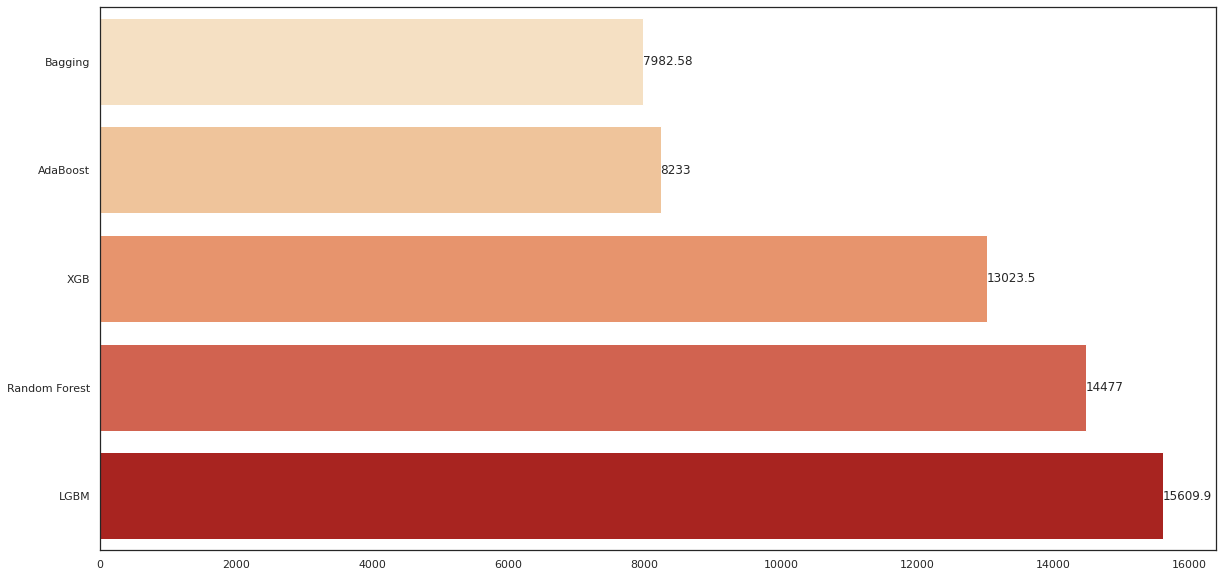

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("white")
scores_plot = sns.barplot(x = list(sorted_dict.values()), y = list(sorted_dict.keys()), palette = 'OrRd')
for i in scores_plot.containers:
    scores_plot.bar_label(i,)

In [ ]:
sorted_tuples = sorted(time_model.items(), key=operator.itemgetter(1))
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict)

{'LGBM': 0.25464630126953125, 'Bagging': 0.2788701057434082, 'Random Forest': 0.753037691116333, 'AdaBoost': 1.3974435329437256, 'XGB': 1.8021743297576904}


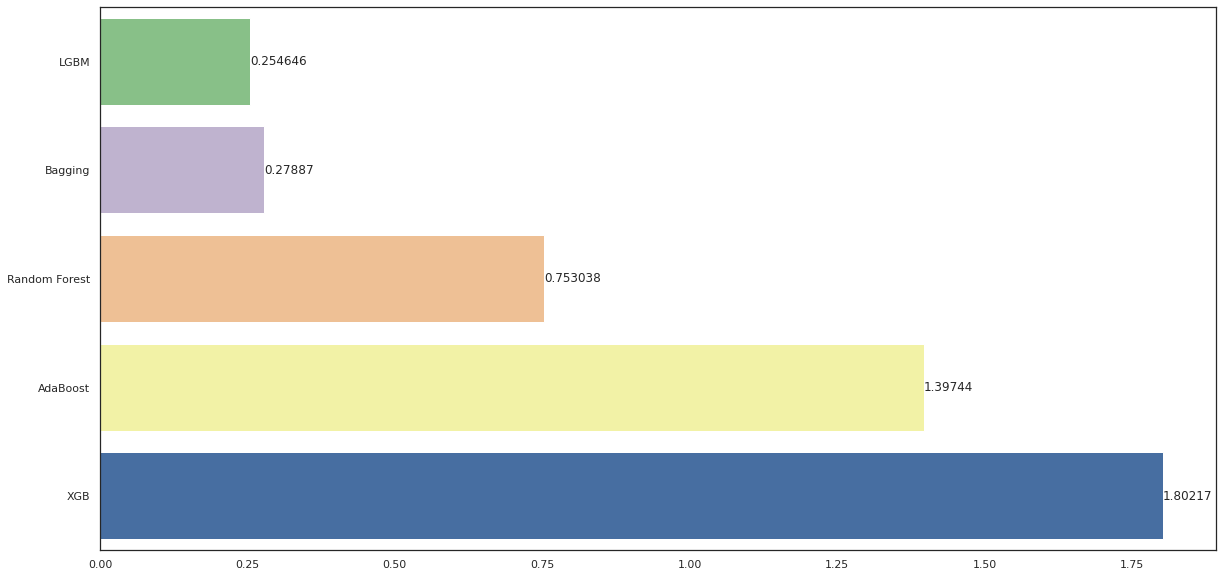

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("white")
scores_plot = sns.barplot(x = list(sorted_dict.values()), y = list(sorted_dict.keys()), palette = 'Accent')
for i in scores_plot.containers:
    scores_plot.bar_label(i,)

Классификация

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
corr = df.corr()

<AxesSubplot:>

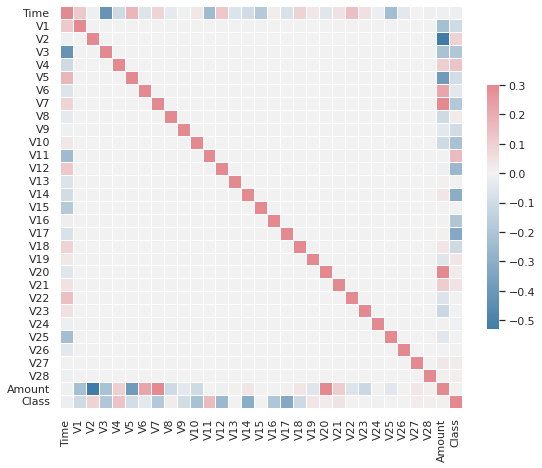

In [ ]:
f, ax = plt.subplots(figsize=(9, 9))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.Class.unique()

array([0, 1])

[Text(0, 0, '284315'), Text(0, 0, '492')]

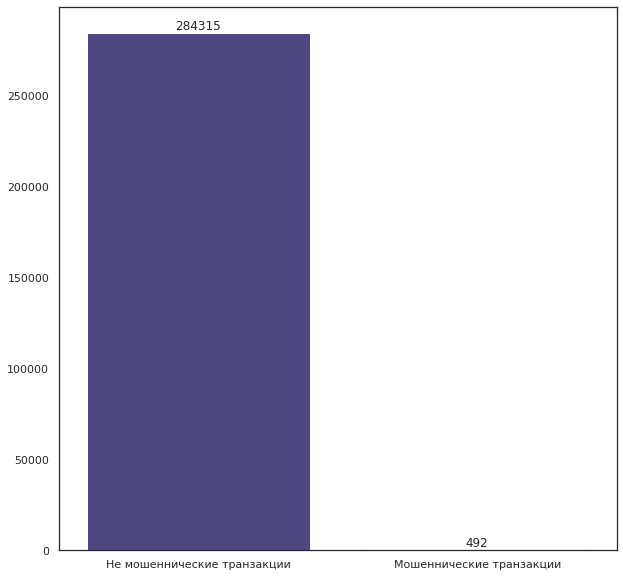

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
fraudchart = sns.barplot(x=['Не мошеннические транзакции', 'Мошеннические транзакции'], y=[284315, 492], color = 'darkslateblue')
fraudchart.bar_label(fraudchart.containers[0])

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Time', ylabel='Count'>

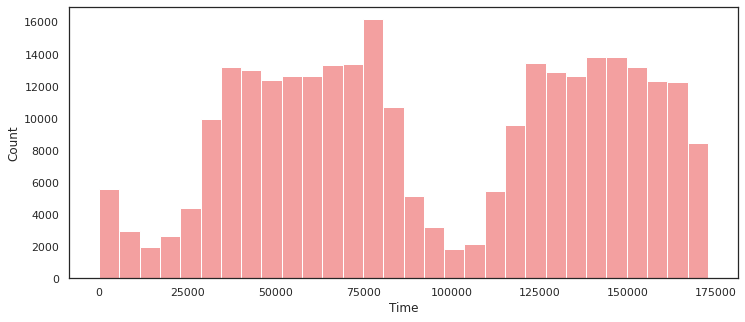

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("white")
sns.histplot(data=df, x='Time', bins = 30, color = 'lightcoral')

<AxesSubplot:xlabel='Time', ylabel='Count'>

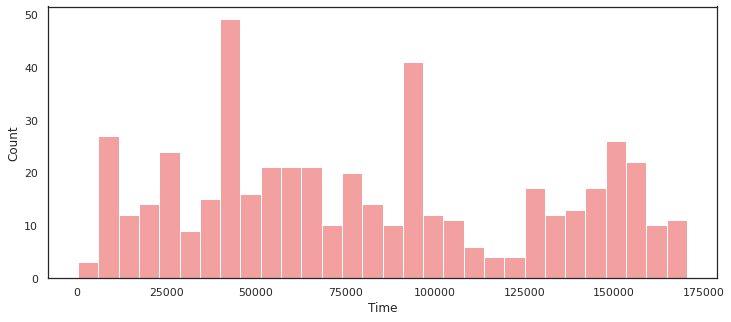

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("white")
sns.histplot(data=df[df.Class == 1], x='Time', bins = 30, color = 'lightcoral')

<AxesSubplot:xlabel='Amount', ylabel='Count'>

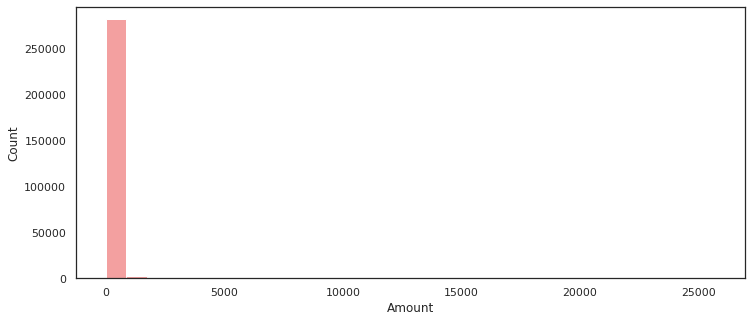

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("white")
sns.histplot(data=df, x='Amount', bins = 30, color = 'lightcoral')

<AxesSubplot:xlabel='Amount', ylabel='Count'>

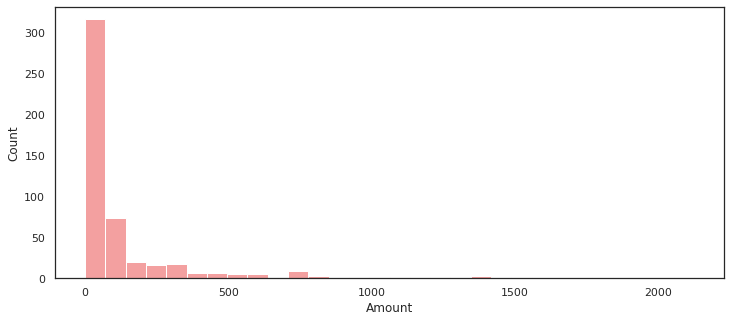

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("white")
sns.histplot(data=df[df.Class == 1], x='Amount', bins = 30, color = 'lightcoral')

Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, average_precision_score as auprc

In [ ]:
def score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print(f"report:\n{clf_report}")
        print(f"confusion matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print(f"report:\n{clf_report}")
        print(f"confusion matrix: \n {confusion_matrix(label, prediction)}\n")

In [ ]:
fbeta_scores_classification = {}
auprc_scores_classification = {}
time_classification = {}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

score(y_train, y_train_pred, train=True)
score(y_test, y_test_pred, train=False)

print("--- %s seconds ---" % (time.time() - start_time))
print(fbeta_score(y_test, y_test_pred, beta = 2))
print(auprc(y_test, y_test_pred))

report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
confusion matrix: 
 [[159204      0]
 [     0    287]]

report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999578    0.657895   0.99897      0.828736      0.999034
recall         0.999390    0.735294   0.99897      0.867342      0.998970
f1-score       0.999484    0.694444   0.99897      0.846964      0.998999
support    85307.000000  136.000000   0.99897  85443.000000  85443.000000
confusion matrix: 
 [[85255    52]
 [   36   100]]

--- 26.229052305221558 seconds ---
0.7183908045977011
0.4841674635515525


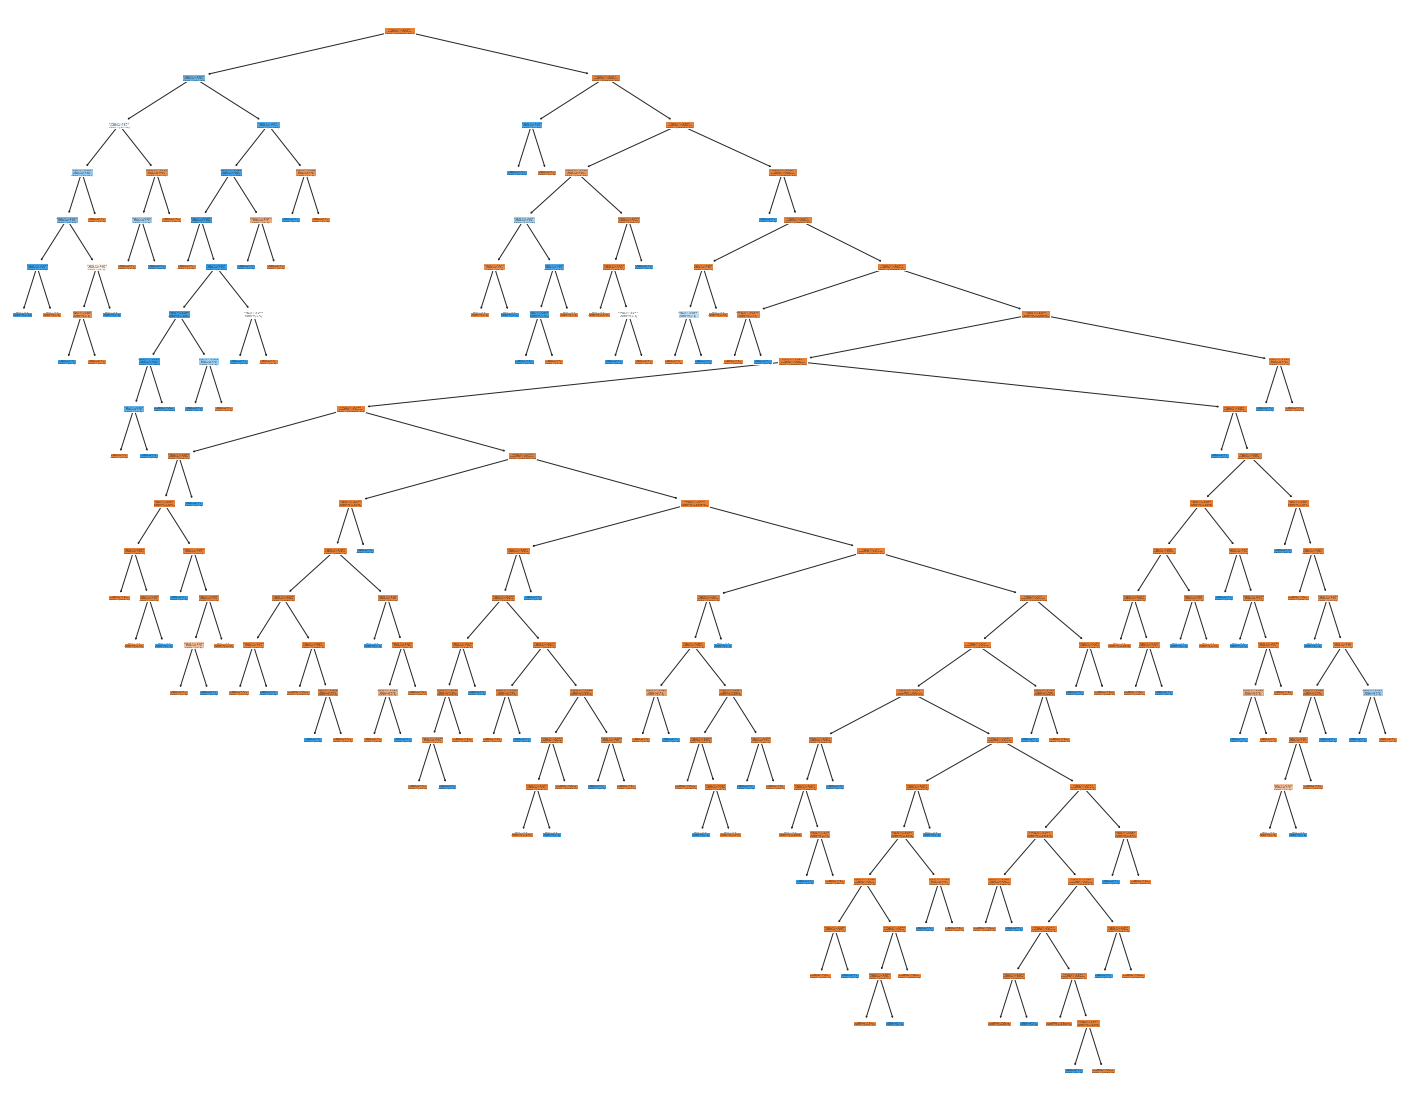

In [ ]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dt_clf,
                   filled=True)

Бустинг

In [ ]:
from xgboost import XGBClassifier

start_time = time.time()
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

score(y_train, y_train_pred, train=True)
score(y_test, y_test_pred, train=False)

fbeta_scores_classification['XGB'] = fbeta_score(y_test, y_test_pred, beta=2)
auprc_scores_classification['XGB'] = auprc(y_test, y_test_pred)
time_classification['XGB'] = time.time() - start_time
xgb_matrix = confusion_matrix(y_test, y_test_pred)
print("--- %s seconds ---" % (time.time() - start_time))

report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999711    0.983673  0.999687       0.991692       0.999682
recall          0.999975    0.839721  0.999687       0.919848       0.999687
f1-score        0.999843    0.906015  0.999687       0.952929       0.999674
support    159204.000000  287.000000  0.999687  159491.000000  159491.000000
confusion matrix: 
 [[159200      4]
 [    46    241]]

report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601
support    85307.000000  136.000000  0.999614  85443.000000  85443.000000
confusion matrix: 
 [[85299     8]
 [   25   111]]

--- 46.43425917625427 seconds ---


In [ ]:
from lightgbm import LGBMClassifier

start_time = time.time()
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

score(y_train, y_train_pred, train=True)
score(y_test, y_test_pred, train=False)

fbeta_scores_classification['LGBM'] = fbeta_score(y_test, y_test_pred, beta=2)
auprc_scores_classification['LGBM'] = auprc(y_test, y_test_pred)
time_classification['LGBM'] = time.time() - start_time
lgbm_matrix = confusion_matrix(y_test, y_test_pred)
print("--- %s seconds ---" % (time.time() - start_time))

report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999441    0.592814  0.998589       0.796128       0.998709
recall          0.999146    0.689895  0.998589       0.844521       0.998589
f1-score        0.999293    0.637681  0.998589       0.818487       0.998643
support    159204.000000  287.000000  0.998589  159491.000000  159491.000000
confusion matrix: 
 [[159068    136]
 [    89    198]]

report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999460    0.350195  0.997507      0.674827      0.998427
recall         0.998042    0.661765  0.997507      0.829904      0.997507
f1-score       0.998751    0.458015  0.997507      0.728383      0.997890
support    85307.000000  136.000000  0.997507  85443.000000  85443.000000
confusion matrix: 
 [[85140   167]
 [   46    90]]

--- 11.52899980545044 seconds ---


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

score(y_train, y_train_pred, train=True)
score(y_test, y_test_pred, train=False)

fbeta_scores_classification['AdaBoost'] = fbeta_score(y_test, y_test_pred, beta=2)
auprc_scores_classification['AdaBoost'] = auprc(y_test, y_test_pred)
time_classification['AdaBoost'] = time.time() - start_time
ada_matrix = confusion_matrix(y_test, y_test_pred)
print("--- %s seconds ---" % (time.time() - start_time))

report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999516    0.795455  0.999179       0.897485       0.999149
recall          0.999661    0.731707  0.999179       0.865684       0.999179
f1-score        0.999589    0.762250  0.999179       0.880920       0.999162
support    159204.000000  287.000000  0.999179  159491.000000  159491.000000
confusion matrix: 
 [[159150     54]
 [    77    210]]

report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999625    0.800000  0.999321      0.899812      0.999307
recall         0.999695    0.764706  0.999321      0.882201      0.999321
f1-score       0.999660    0.781955  0.999321      0.890807      0.999314
support    85307.000000  136.000000  0.999321  85443.000000  85443.000000
confusion matrix: 
 [[85281    26]
 [   32   104]]

--- 78.59775304794312 seconds ---


Бэггинг

In [ ]:
from sklearn.ensemble import BaggingClassifier

start_time = time.time()
bg_clf =  BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=15, random_state=1)
bg_clf.fit(X_train, y_train)

y_train_pred = bg_clf.predict(X_train)
y_test_predict = bg_clf.predict(X_test)

score(y_train, y_train_pred, train = True)
score(y_test, y_test_pred, train = False)

fbeta_scores_classification['Bagging'] = fbeta_score(y_test, y_test_pred, beta=2)
auprc_scores_classification['Bagging'] = auprc(y_test, y_test_pred)
time_classification['Bagging'] = time.time() - start_time
bg_matrix = confusion_matrix(y_test, y_test_pred)
print("--- %s seconds ---" % (time.time() - start_time))

report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999969    1.000000  0.999969       0.999984       0.999969
recall          1.000000    0.982578  0.999969       0.991289       0.999969
f1-score        0.999984    0.991213  0.999969       0.995598       0.999969
support    159204.000000  287.000000  0.999969  159491.000000  159491.000000
confusion matrix: 
 [[159204      0]
 [     5    282]]

report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.909836  0.999579      0.954772      0.999564
recall         0.999871    0.816176  0.999579      0.908024      0.999579
f1-score       0.999789    0.860465  0.999579      0.930127      0.999567
support    85307.000000  136.000000  0.999579  85443.000000  85443.000000
confusion matrix: 
 [[85296    11]
 [   25   111]]

--- 163.2861030101776 seconds ---


 Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

score(y_train, y_train_pred, train=True)
score(y_test, y_test_pred, train=False)

fbeta_scores_classification['Random Forest'] = fbeta_score(y_test, y_test_pred, beta=2)
auprc_scores_classification['Random Forest'] = auprc(y_test, y_test_pred)
time_classification['Random Forest'] = time.time() - start_time
rf_matrix = confusion_matrix(y_test, y_test_pred)
print("--- %s seconds ---" % (time.time() - start_time))

report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
confusion matrix: 
 [[159204      0]
 [     0    287]]

report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.909836  0.999579      0.954772      0.999564
recall         0.999871    0.816176  0.999579      0.908024      0.999579
f1-score       0.999789    0.860465  0.999579      0.930127      0.999567
support    85307.000000  136.000000  0.999579  85443.000000  85443.000000
confusion matrix: 
 [[85296    11]
 [   25   111]]

--- 181.50494647026062 seconds ---


In [ ]:
fbeta_scores_classification

{'AdaBoost': 0.7715133531157269,
 'Bagging': 0.8333333333333333,
 'LGBM': 0.5617977528089888,
 'Random Forest': 0.8333333333333333,
 'XGB': 0.83710407239819}

In [ ]:
import operator

sorted_tuples = sorted(fbeta_scores_classification.items(), key=operator.itemgetter(1), reverse = True)
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict)

{'XGB': 0.83710407239819, 'Bagging': 0.8333333333333333, 'Random Forest': 0.8333333333333333, 'AdaBoost': 0.7715133531157269, 'LGBM': 0.5617977528089888}


[Text(0, 0, '0.837104'),
 Text(0, 0, '0.833333'),
 Text(0, 0, '0.833333'),
 Text(0, 0, '0.771513'),
 Text(0, 0, '0.561798')]

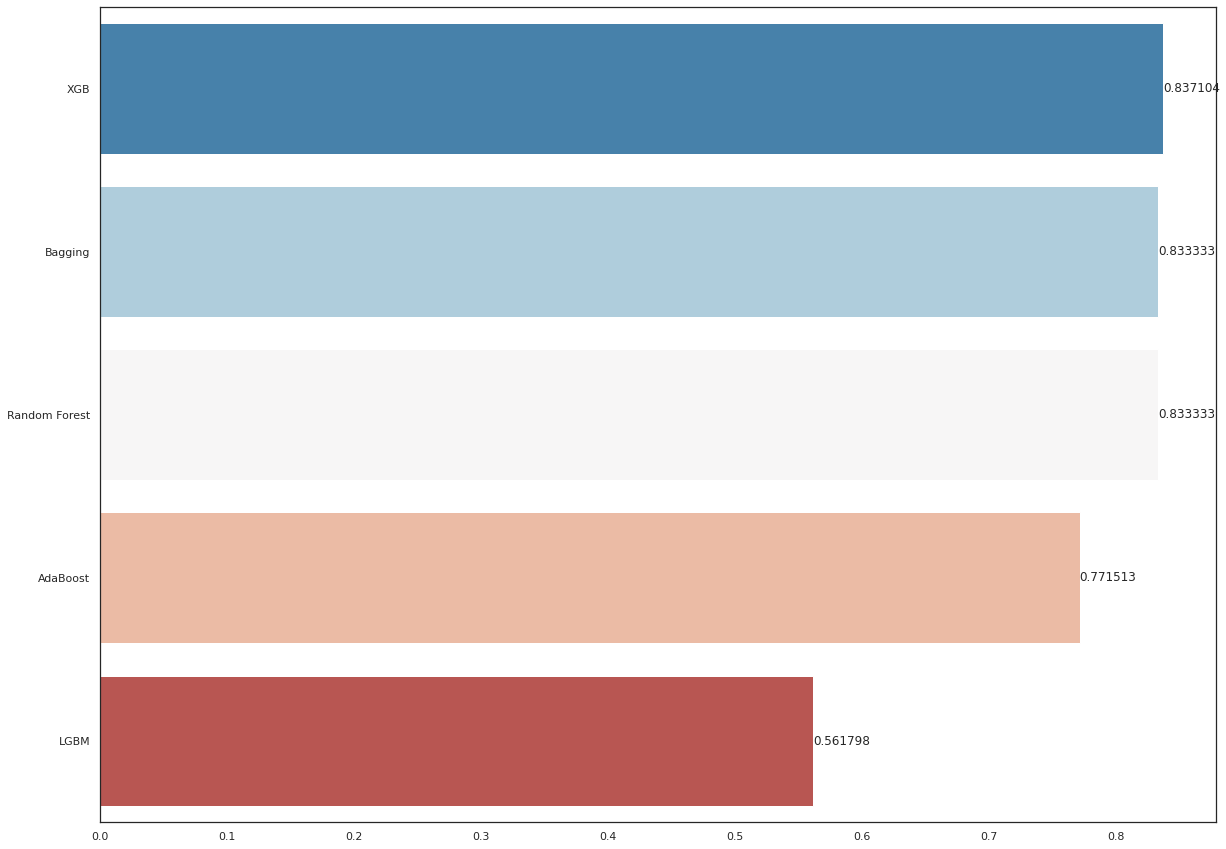

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("white")
scores_plot = sns.barplot(x = list(sorted_dict.values()), y = list(sorted_dict.keys()), palette = 'RdBu_r')
scores_plot.bar_label(scores_plot.containers[0])

In [ ]:
auprc_scores_classification

{'AdaBoost': 0.6121392245673243,
 'Bagging': 0.74287938153652,
 'LGBM': 0.2322847656657231,
 'Random Forest': 0.74287938153652,
 'XGB': 0.7616000568847693}

In [ ]:
import operator

sorted_tuples = sorted(auprc_scores_classification.items(), key=operator.itemgetter(1), reverse = True)
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict)

{'XGB': 0.7616000568847693, 'Bagging': 0.74287938153652, 'Random Forest': 0.74287938153652, 'AdaBoost': 0.6121392245673243, 'LGBM': 0.2322847656657231}


[Text(0, 0, '0.7616'),
 Text(0, 0, '0.742879'),
 Text(0, 0, '0.742879'),
 Text(0, 0, '0.612139'),
 Text(0, 0, '0.232285')]

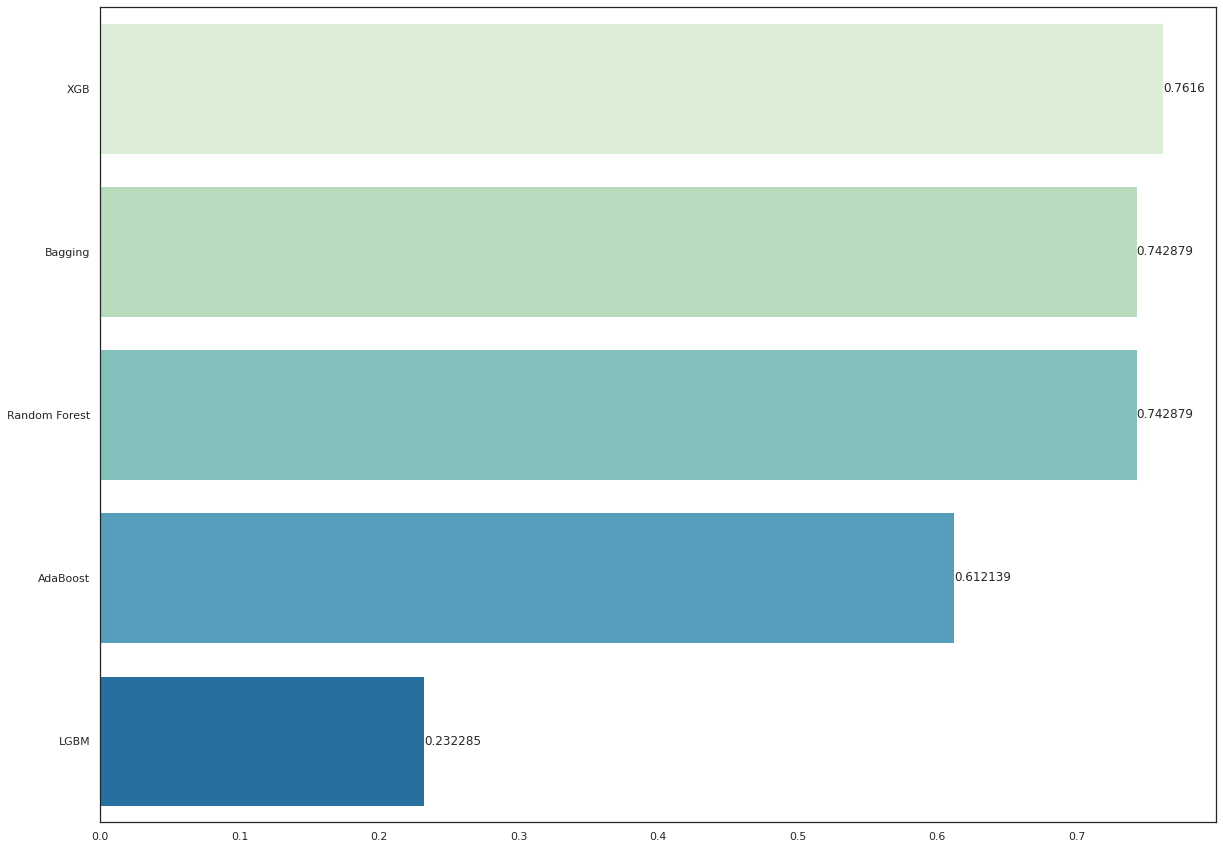

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("white")
scores_plot = sns.barplot(x = list(sorted_dict.values()), y = list(sorted_dict.keys()), palette = 'GnBu')
scores_plot.bar_label(scores_plot.containers[0])

In [ ]:
time_classification

{'AdaBoost': 78.58298087120056,
 'Bagging': 136.3181335926056,
 'LGBM': 11.514081001281738,
 'Random Forest': 181.4899549484253,
 'XGB': 46.415664196014404}

In [ ]:
sorted_tuples = sorted(time_classification.items(), key=operator.itemgetter(1), reverse = False)
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict)

{'LGBM': 11.514081001281738, 'XGB': 46.415664196014404, 'AdaBoost': 78.58298087120056, 'Bagging': 136.3181335926056, 'Random Forest': 181.4899549484253}


[Text(0, 0, '11.5141'),
 Text(0, 0, '46.4157'),
 Text(0, 0, '78.583'),
 Text(0, 0, '136.318'),
 Text(0, 0, '181.49')]

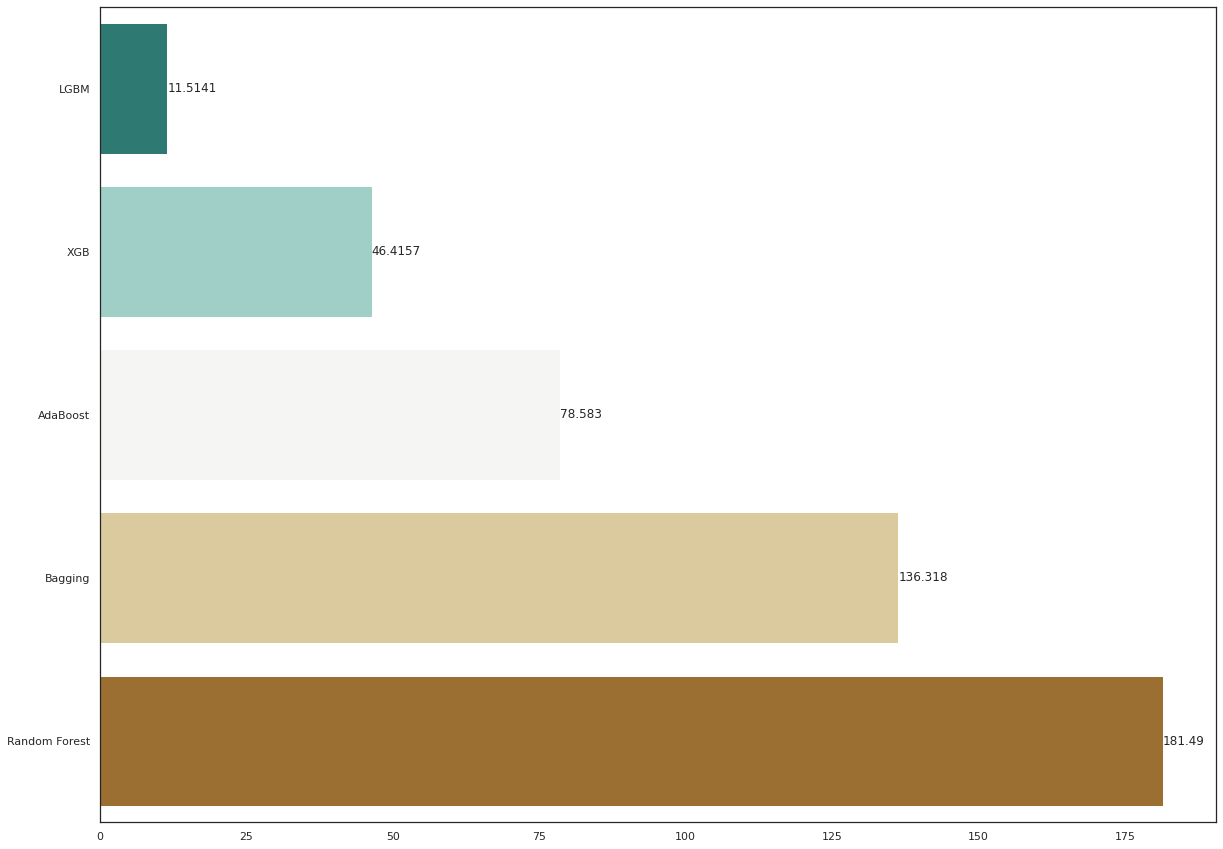

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("white")
scores_plot = sns.barplot(x = list(sorted_dict.values()), y = list(sorted_dict.keys()), palette = 'BrBG_r')
scores_plot.bar_label(scores_plot.containers[0])

<AxesSubplot:>

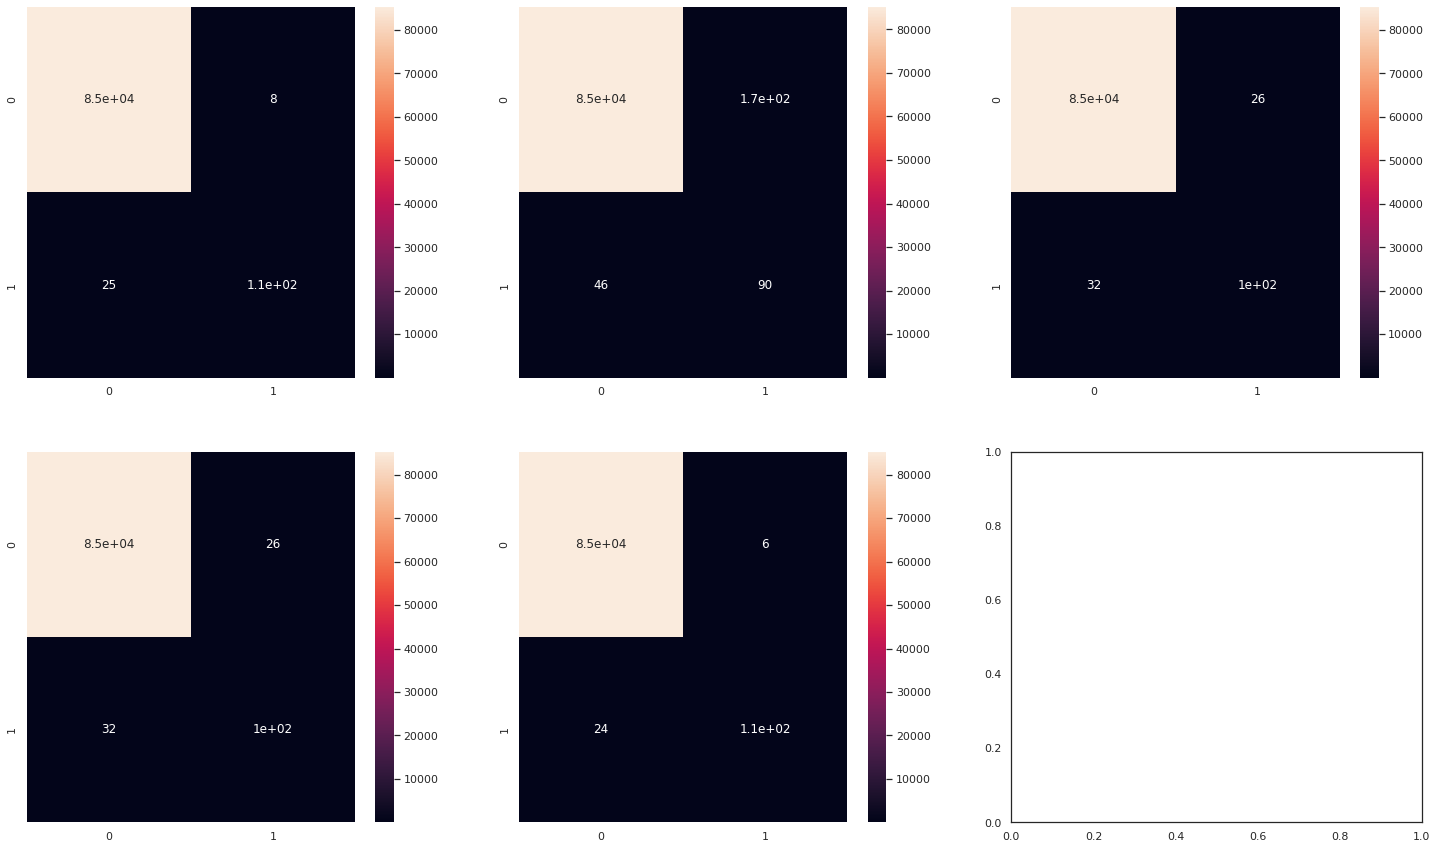

In [ ]:
sns.set(rc={'figure.figsize':(25,15)})
sns.set_style("white")

fig, axes = plt.subplots(2, 3)

sns.heatmap(xgb_matrix, annot=True, ax=axes[0,0])
sns.heatmap(lgbm_matrix, annot=True, ax=axes[0,1])
sns.heatmap(ada_matrix, annot=True, ax=axes[0,2])
sns.heatmap(bg_matrix, annot=True, ax=axes[1,0])
sns.heatmap(rf_matrix, annot=True, ax=axes[1,1])